
# Dicoding Data Analysis Project : Bikesharing Dataset

This project is intended for as submission to Dicoding Data Analysis Final Project.
For this project, I will analyze the bike sharing dataset.

## Questions to be answered
	1. Is the number of casual and registered users grow throughout 2011-2012?
	1. Do adverse weather situations affect both registered users and casual users?
	3. What season favored by registered user, casual user and both users?
	
## Dataset Description
The dataset is a record of bikesharing usage between 2011 to 2012 which contains multiple columns:

	1. instant: record index
	2. dteday : date
	3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
	4. yr : year (0: 2011, 1:2012)
	5. mnth : month ( 1 to 12)
	6. hr : hour (0 to 23)
	7. holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	8. weekday : day of the week
	9. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	10. weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	11. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	12. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	13. hum: Normalized humidity. The values are divided to 100 (max)
	14. windspeed: Normalized wind speed. The values are divided to 67 (max)
	15. casual: count of casual users
	16. registered: count of registered users
	17. cnt: count of total rental bikes including both casual and registered

### Libraries used in this Analysis Project

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st


## Data Overview

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Data type inside dteday column is object/string so the column needs to be transformed into datetime data.

This also shows no null values inside the dataset.

### Converting the dteday Column

In [4]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Transforming Temperature, Humidity, and Windspeed Values

In [5]:
hour_df[['temp','atemp','hum','windspeed']] = hour_df[['temp','atemp','hum','windspeed']].mul({'temp' : 41, 'atemp' : 51, 'hum' : 100, 'windspeed' : 67})
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.6829,81.0,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.9077,80.0,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.9077,80.0,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.6829,75.0,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.6829,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,10.66,13.1376,60.0,11.0014,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,10.66,13.1376,60.0,11.0014,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,10.66,13.1376,60.0,11.0014,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,10.66,13.9077,56.0,8.9981,13,48,61


As described above, the values inside temp, atemp, hum, and windspeed columns are divided:

	1. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	2. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	3. hum: Normalized humidity. The values are divided to 100 (max)
	4. windspeed: Normalized wind speed. The values are divided to 67 (max)

### Checking for Unique Values

In [6]:
pd.set_option('display.max_colwidth', None)
listItem = []
for column in hour_df.columns :
    listItem.append( [column, hour_df[column].nunique(), hour_df[column].unique()])


hourDescibe = pd.DataFrame(columns=['Column Name', 'Number of Unique Data', 'Unique Sample'], data=listItem)
hourDescibe

,Column Name,Number of Unique Data,Unique Sample
0,instant,17379,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,dteday,731,"[2011-01-01T00:00:00.000000000, 2011-01-02T00:00:00.000000000, 2011-01-03T00:00:00.000000000, 2011-01-04T00:00:00.000000000, 2011-01-05T00:00:00.000000000, 2011-01-06T00:00:00.000000000, 2011-01-07T00:00:00.000000000, 2011-01-08T00:00:00.000000000, 2011-01-09T00:00:00.000000000, 2011-01-10T00:00:00.000000000, 2011-01-11T00:00:00.000000000, 2011-01-12T00:00:00.000000000, 2011-01-13T00:00:00.000000000, 2011-01-14T00:00:00.000000000, 2011-01-15T00:00:00.000000000, 2011-01-16T00:00:00.000000000, 2011-01-17T00:00:00.000000000, 2011-01-18T00:00:00.000000000, 2011-01-19T00:00:00.000000000, 2011-01-20T00:00:00.000000000, 2011-01-21T00:00:00.000000000, 2011-01-22T00:00:00.000000000, 2011-01-23T00:00:00.000000000, 2011-01-24T00:00:00.000000000, 2011-01-25T00:00:00.000000000, 2011-01-26T00:00:00.000000000, 2011-01-27T00:00:00.000000000, 2011-01-28T00:00:00.000000000, 2011-01-29T00:00:00.000000000, 2011-01-30T00:00:00.000000000, 2011-01-31T00:00:00.000000000, 2011-02-01T00:00:00.000000000, 2011-02-02T00:00:00.000000000, 2011-02-03T00:00:00.000000000, 2011-02-04T00:00:00.000000000, 2011-02-05T00:00:00.000000000, 2011-02-06T00:00:00.000000000, 2011-02-07T00:00:00.000000000, 2011-02-08T00:00:00.000000000, 2011-02-09T00:00:00.000000000, 2011-02-10T00:00:00.000000000, 2011-02-11T00:00:00.000000000, 2011-02-12T00:00:00.000000000, 2011-02-13T00:00:00.000000000, 2011-02-14T00:00:00.000000000, 2011-02-15T00:00:00.000000000, 2011-02-16T00:00:00.000000000, 2011-02-17T00:00:00.000000000, 2011-02-18T00:00:00.000000000, 2011-02-19T00:00:00.000000000, 2011-02-20T00:00:00.000000000, 2011-02-21T00:00:00.000000000, 2011-02-22T00:00:00.000000000, 2011-02-23T00:00:00.000000000, 2011-02-24T00:00:00.000000000, 2011-02-25T00:00:00.000000000, 2011-02-26T00:00:00.000000000, 2011-02-27T00:00:00.000000000, 2011-02-28T00:00:00.000000000, 2011-03-01T00:00:00.000000000, 2011-03-02T00:00:00.000000000, 2011-03-03T00:00:00.000000000, 2011-03-04T00:00:00.000000000, 2011-03-05T00:00:00.000000000, 2011-03-06T00:00:00.000000000, 2011-03-07T00:00:00.000000000, 2011-03-08T00:00:00.000000000, 2011-03-09T00:00:00.000000000, 2011-03-10T00:00:00.000000000, 2011-03-11T00:00:00.000000000, 2011-03-12T00:00:00.000000000, 2011-03-13T00:00:00.000000000, 2011-03-14T00:00:00.000000000, 2011-03-15T00:00:00.000000000, 2011-03-16T00:00:00.000000000, 2011-03-17T00:00:00.000000000, 2011-03-18T00:00:00.000000000, 2011-03-19T00:00:00.000000000, 2011-03-20T00:00:00.000000000, 2011-03-21T00:00:00.000000000, 2011-03-22T00:00:00.000000000, 2011-03-23T00:00:00.000000000, 2011-03-24T00:00:00.000000000, 2011-03-25T00:00:00.000000000, 2011-03-26T00:00:00.000000000, 2011-03-27T00:00:00.000000000, 2011-03-28T00:00:00.000000000, 2011-03-29T00:00:00.000000000, 2011-03-30T00:00:00.000000000, 2011-03-31T00:00:00.000000000, 2011-04-01T00:00:00.000000000, 2011-04-02T00:00:00.000000000, 2011-04-03T00:00:00.000000000, 2011-04-04T00:00:00.000000000, 2011-04-05T00:00:00.000000000, 2011-04-06T00:00:00.000000000, 2011-04-07T00:00:00.000000000, 2011-04-08T00:00:00.000000000, 2011-04-09T00:00:00.000000000, 2011-04-10T00:00:00.000000000, ...]"
2,season,4,"[1, 2, 3, 4]"
3,yr,2,"[0, 1]"
4,mnth,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,hr,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]"
6,holiday,2,"[0, 1]"
7,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
8,workingday,2,"[0, 1]"
9,weathersit,4,"[1, 2, 3, 4]"


This section shows all the unique values inside the dataset.

There are no wrong data inside columns: season, yr, mnth, hr, holiday, weekday, workingday, and weathersit.
<br/>The values inside those column fits the data description above.

Checking columns of measured data such as temp, atemp, etc. are not effective but included in this dataframe.

### Checking Miscalculation on Total User Count

In [7]:
hour_df['miscalc'] = hour_df['cnt'] - (hour_df['registered'] + hour_df['casual'])
hour_df[['registered', 'casual', 'cnt','miscalc']].sort_values(by = 'miscalc', ascending = False)

,registered,casual,cnt,miscalc
0,13,3,16,0
11591,2,0,2,0
11577,189,51,240,0
11578,204,52,256,0
11579,313,54,367,0
...,...,...,...,...
5798,38,37,75,0
5799,43,17,60,0
5800,23,20,43,0
5801,4,0,4,0


No miscalculation found on total user count.

### Checking for Duplicated Data
The data inside are measured through 24 hours throughout 2 years so date and season should not be checked for duplicates but the rest of columns should be checked for duplicates.

In [8]:
print('Amount of duplicated data: ',hour_df[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].duplicated().sum())

Amount of duplicated data:  0


No duplicated data inside the dataset.

In [9]:
hour_df['windspeed'].max()

56.996900000000004

In [10]:
hour_df[hour_df['windspeed'] == 56.996900000000004]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc
4315,4316,2011-07-03,3,0,7,17,0,0,0,3,32.8,37.8624,49.0,56.9969,181,177,358,0
4316,4317,2011-07-03,3,0,7,18,0,0,0,3,32.8,37.8624,49.0,56.9969,74,107,181,0


# User Growth
Analyzing the growth of users in quarters per year.

In [11]:
hour_df['quarter'] = hour_df.mnth.apply(lambda x: 'q1' if x < 4 else ('q2' if x < 7 else ('q3' if x < 10 else 'q4')))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.6829,81.0,0.0,3,13,16,0,q1
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.9077,80.0,0.0,8,32,40,0,q1
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.9077,80.0,0.0,5,27,32,0,q1
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.6829,75.0,0.0,3,10,13,0,q1
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.6829,75.0,0.0,0,1,1,0,q1


In [12]:
hour_df1 = hour_df.copy()

Aggregating the summary of users, both registered and casual in year 0.

In [13]:
user_year0 = hour_df1[hour_df1['yr'] == 0].groupby(by = 'quarter').agg({
    'registered' : 'sum',
    'casual' : 'sum'
})
user_year0['yr'] = 0
user_year0

,registered,casual,yr
quarter,,,
q1,128308,22141,0
q2,290195,84008,0
q3,313611,91839,0
q4,263737,49264,0


Aggregating the summary of users, both registered and casual in year 1.

In [14]:
user_year1 = hour_df1[hour_df1['yr'] == 1].groupby(by = 'quarter').agg({
    'registered' : 'sum',
    'casual' : 'sum'
})
user_year1['yr'] = 1
user_year1

,registered,casual,yr
quarter,,,
q1,315448,49308,1
q2,446934,125985,1
q3,508003,128680,1
q4,406426,68792,1


In quick glance, both registered user and casual user amount has grown significantly.

Both dataframes need to be combined in order to visualize the growth of users.

In [15]:
total_users = user_year0.append(user_year1).sort_values(by = 'quarter')
total_users

C:\Users\Han\AppData\Local\Temp\ipykernel_14196\1508174274.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_users = user_year0.append(user_year1).sort_values(by = 'quarter')


,registered,casual,yr
quarter,,,
q1,128308,22141,0
q1,315448,49308,1
q2,290195,84008,0
q2,446934,125985,1
q3,313611,91839,0
q3,508003,128680,1
q4,263737,49264,0
q4,406426,68792,1


## Graph of Users

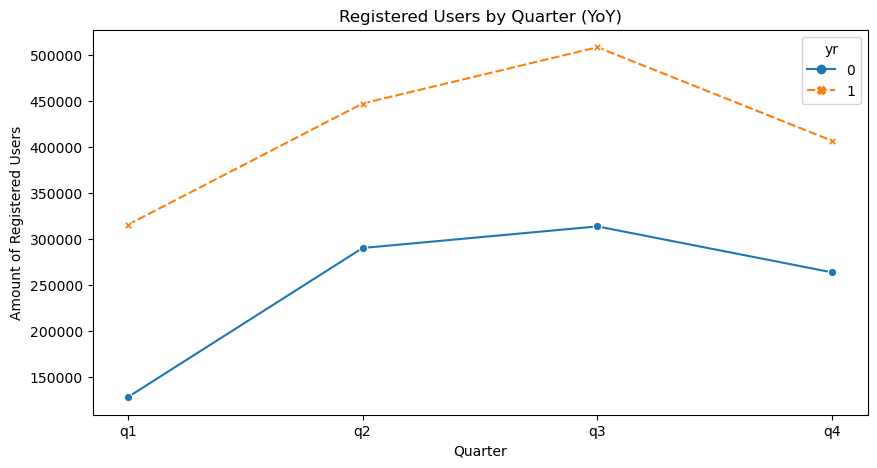

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = 'quarter',
    y = 'registered',
    data = total_users,
    hue = 'yr',
    style = 'yr',
    markers = True
)
plt.xlabel('Quarter')
plt.ylabel('Amount of Registered Users')
plt.title('Registered Users by Quarter (YoY)')
plt.show()

This line graph shows the amount of registered users per quarter in both year 0 (blue solid line) and year 1 (dashed orange line).
<br/>The amount of increase of registered users compared from year 1 is very significant over year 0.

Amount of registered user on fourth quarter looks starting to taper off compared with third quarter. This may coincide with the change of season from Fall to Winter.

According to __[Calendarr](https://www.calendarr.com/united-states/seasons-of-the-year-in-the-united-states/)__ the four seasons in USA are comprised of:

    1. Spring, starts from March to May
    2. Summer, starts from June to August
    3. Fall, starts from September to November
    4. Winter, starts from December to February

Quarter in year comprised of:

    1. Q1, from January to March
    2. Q2, from April to June
    3. Q3, from July to September
    4. Q4, from October to December

As such, the tapering of users between third to fourth quarter it is strongly suggested by the temperatures getting colder in Fall and Winter months and the increase of users in earlier quarters coincide with the temperatures starting to get warmer in Spring and Summer.


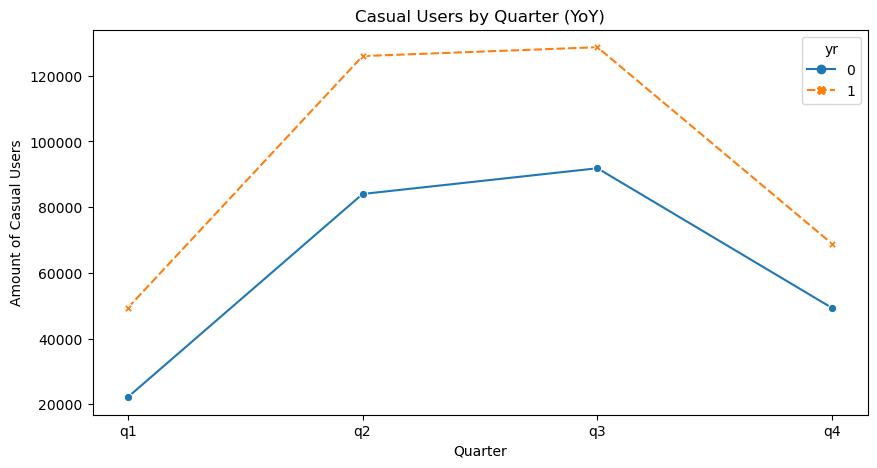

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = 'quarter',
    y = 'casual',
    data = total_users,
    hue = 'yr',
    style = 'yr',
    markers = True
)
plt.xlabel('Quarter')
plt.ylabel('Amount of Casual Users')
plt.title('Casual Users by Quarter (YoY)')
plt.show()

This line graph shows the amount of casual users per quarter in both year 0 (blue solid line) and year 1 (dashed orange line).
<br/>The amount of increase of casual users compared from year 1 is very significant over year 0, having the same trend with amount of registered user.

The characteristic of the graph do follows the graph of registered users above, albeit the difference between third and fourth quarter is stronger on casual users compared to registered user.

## Calculating the Percentage Increase of Users

In [18]:
diff_reg = []
increase_reg = []
for q in range(len(user_year1['registered'])):
    diff_reg.append(user_year1['registered'][q] - user_year0['registered'][q])
    increase_reg.append((user_year1['registered'][q] * 100 - user_year0['registered'][q])/user_year0['registered'][q])

In [19]:
diff_cas = []
increase_cas = []
for q in range(len(user_year1['casual'])):
    diff_cas.append(user_year1['casual'][q] - user_year0['casual'][q])
    increase_cas.append((user_year1['casual'][q] * 100 - user_year0['casual'][q])/user_year0['casual'][q])

In [20]:
zipped = list(zip(diff_reg, increase_reg, diff_cas, increase_cas))
indeq = ['q1', 'q2', 'q3', 'q4']

compare = pd.DataFrame(zipped, columns = ['diff_reg', 'increase_reg', 'diff_cas', 'increase_cas'], index= indeq)
compare.loc['avg'] = compare.mean()
compare

,diff_reg,increase_reg,diff_cas,increase_cas
q1,187140.0,244.852168,27167.00,221.699968
q2,156739.0,153.011613,41977.00,148.967860
q3,194392.0,160.985071,36841.00,139.114766
q4,142689.0,153.102761,19528.00,138.639493
avg,170240.0,177.987903,31378.25,162.105522


Calculating the increase of each quarter compared from year 0 and year 1 shows that the increase of users for both registered and casual was huge. In first quarter, the increase of regular users reached 244.85% compared to year 0, followed by second quarter 153.01%, third 160.98%, and fourth 153.1%. The increase of users in all quarters averages 177.99% for registered user.

The increase of casual user were not as huge as registered user. First quarter reaches 221.7%, second quarter 148.97%, third quarter 139.11% and fourth quarter 138.64%. The increase of casual users averages 162.10% from year 0.

In [21]:
compare_g = compare.copy()
compare_g.drop('avg', inplace= True)

compare_g.index.name = 'quarter'
compare_g

,diff_reg,increase_reg,diff_cas,increase_cas
quarter,,,,
q1,187140.0,244.852168,27167.0,221.699968
q2,156739.0,153.011613,41977.0,148.967860
q3,194392.0,160.985071,36841.0,139.114766
q4,142689.0,153.102761,19528.0,138.639493


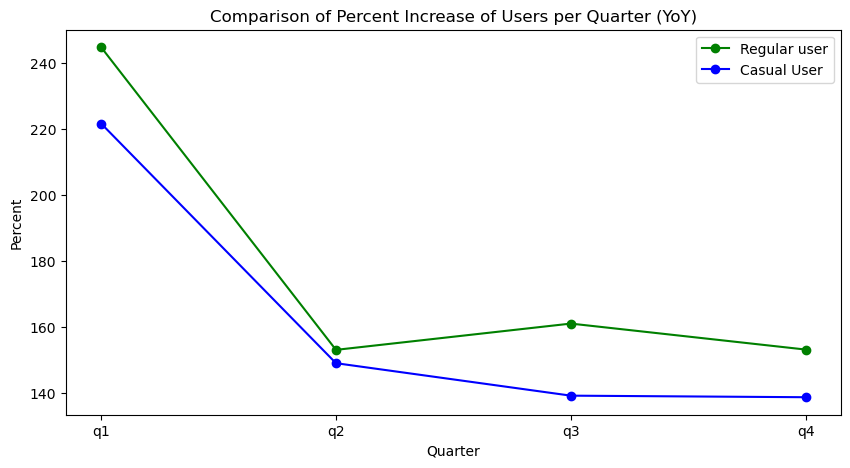

In [22]:
plt.figure(figsize=(10,5))
plt.plot(
    compare_g.index,
    compare_g['increase_reg'],
    '-go',
    compare_g['increase_cas'],
    '-bo'
)
plt.title('Comparison of Percent Increase of Users per Quarter (YoY)')
plt.xlabel('Quarter')
plt.ylabel('Percent')
plt.legend(['Regular user','Casual User'])
plt.show()

Graph form of calculation of increase of users or growth of users.

# Weather Situation

Analyze the effect of adverse weather with amount of users.

We are given the description of the data inside weathersit column such as:

    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

For this analysis, let's assume adverse weather situation are 3 & 4, although mist can be adverse if thick enough but the dataset does not have enough explanation on mist weather condition.

#### Checking from weathersit column

In [23]:
adverse = hour_df1[hour_df1['weathersit'] >2].sort_values(by = 'instant')
adverse

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
18,19,2011-01-01,1,0,1,18,0,6,0,3,17.22,21.6342,88.0,16.9979,9,26,35,0,q1
19,20,2011-01-01,1,0,1,19,0,6,0,3,17.22,21.6342,88.0,16.9979,6,31,37,0,q1
29,30,2011-01-02,1,0,1,6,0,0,0,3,17.22,21.6342,77.0,19.9995,0,2,2,0,q1
31,32,2011-01-02,1,0,1,8,0,0,0,3,16.40,20.8641,71.0,15.0013,0,8,8,0,q1
37,38,2011-01-02,1,0,1,14,0,0,0,3,14.76,17.7735,76.0,12.9980,4,55,59,0,q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,17261,2012-12-27,1,1,12,1,0,4,1,3,9.84,10.0470,93.0,30.0026,0,5,5,0,q4
17317,17318,2012-12-29,1,1,12,10,0,6,0,3,10.66,12.3624,81.0,8.9981,6,35,41,0,q4
17318,17319,2012-12-29,1,1,12,11,0,6,0,3,8.20,12.3624,93.0,6.0032,7,38,45,0,q4
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,8.20,12.3624,100.0,0.0000,5,43,48,0,q4


### Checking from windspeed

As there is no explanation of unit used to measure windspeed but the temperature data are measured in Celcius, we can assume the windspeed is measured with km/hr.

We can use __[Beaufort Wind Scale](https://en.wikipedia.org/wiki/Beaufort_scale)__ as simple reference to classify the windspeed data.

Scale 7 (50 - 61km/h) is described as feeling inconvinienced when walking so windspeed above 50 can be considered adverse.

In [24]:
wind = hour_df1[hour_df1['windspeed'] >= 50].sort_values(by = 'windspeed')
wind = wind.drop(wind[wind.weathersit == 3].index)
wind

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
1125,1126,2011-02-19,1,0,2,15,0,6,0,1,18.04,22.4094,16.0,50.0021,84,87,171,0,q1
1261,1262,2011-02-25,1,0,2,17,0,5,1,1,13.12,13.9077,49.0,50.0021,8,181,189,0,q1
1017,1018,2011-02-15,1,0,2,1,0,2,1,1,12.30,12.3624,42.0,51.9987,0,5,5,0,q1
1259,1260,2011-02-25,1,0,2,15,0,5,1,1,18.86,23.1795,41.0,54.0020,5,50,55,0,q1
9956,9957,2012-02-24,1,1,2,21,0,5,1,1,17.22,21.6342,35.0,54.0020,1,151,152,0,q1


### Checking from normalized temperature
Normalized feel temperature is a temperature measurement which considers the effect of humidity and windspeed in surrounding air, so atemp column is measured temperature that closely follow human feel in the measured weather conditions.

* Extreme hot temperature:

In [25]:
temp = hour_df1[hour_df1['atemp'] >= 40].sort_values(by = 'temp')
temp

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
4756,4757,2011-07-22,3,0,7,2,0,5,1,1,31.98,40.9530,79.0,8.9981,0,14,14,0,q3
4757,4758,2011-07-22,3,0,7,3,0,5,1,1,31.98,40.1829,75.0,7.0015,1,6,7,0,q3
4432,4433,2011-07-08,3,0,7,14,0,5,1,2,32.80,40.1829,63.0,23.9994,53,163,216,0,q3
12785,12786,2012-06-21,3,1,6,22,0,4,1,1,32.80,40.1829,63.0,11.0014,22,221,243,0,q2
4761,4762,2011-07-22,3,0,7,7,0,5,1,2,32.80,40.9530,66.0,7.0015,20,232,252,0,q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,4940,2011-07-29,3,0,7,17,0,5,1,1,39.36,44.0436,30.0,19.9995,47,374,421,0,q3
4936,4937,2011-07-29,3,0,7,14,0,5,1,1,39.36,44.0436,30.0,15.0013,34,114,148,0,q3
4934,4935,2011-07-29,3,0,7,12,0,5,1,1,39.36,44.0436,31.0,19.0012,40,95,135,0,q3
12972,12973,2012-06-29,3,1,6,17,0,5,1,1,40.18,47.1342,34.0,12.9980,82,457,539,0,q2


* Extreme cold temperature:

In [26]:
hour_df1[hour_df1['atemp'] < 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter


No data with below zero temperature so let's continue with combining the dataframes.

In [27]:
adverse = adverse.append(temp).sort_values(by = 'instant')
adverse.drop_duplicates()

C:\Users\Han\AppData\Local\Temp\ipykernel_14196\411858659.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adverse = adverse.append(temp).sort_values(by = 'instant')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
18,19,2011-01-01,1,0,1,18,0,6,0,3,17.22,21.6342,88.0,16.9979,9,26,35,0,q1
19,20,2011-01-01,1,0,1,19,0,6,0,3,17.22,21.6342,88.0,16.9979,6,31,37,0,q1
29,30,2011-01-02,1,0,1,6,0,0,0,3,17.22,21.6342,77.0,19.9995,0,2,2,0,q1
31,32,2011-01-02,1,0,1,8,0,0,0,3,16.40,20.8641,71.0,15.0013,0,8,8,0,q1
37,38,2011-01-02,1,0,1,14,0,0,0,3,14.76,17.7735,76.0,12.9980,4,55,59,0,q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,17261,2012-12-27,1,1,12,1,0,4,1,3,9.84,10.0470,93.0,30.0026,0,5,5,0,q4
17317,17318,2012-12-29,1,1,12,10,0,6,0,3,10.66,12.3624,81.0,8.9981,6,35,41,0,q4
17318,17319,2012-12-29,1,1,12,11,0,6,0,3,8.20,12.3624,93.0,6.0032,7,38,45,0,q4
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,8.20,12.3624,100.0,0.0000,5,43,48,0,q4


In [28]:
adverse = adverse.append(wind).sort_values(by = 'instant')
adverse.drop_duplicates()

C:\Users\Han\AppData\Local\Temp\ipykernel_14196\755483622.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adverse = adverse.append(wind).sort_values(by = 'instant')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
18,19,2011-01-01,1,0,1,18,0,6,0,3,17.22,21.6342,88.0,16.9979,9,26,35,0,q1
19,20,2011-01-01,1,0,1,19,0,6,0,3,17.22,21.6342,88.0,16.9979,6,31,37,0,q1
29,30,2011-01-02,1,0,1,6,0,0,0,3,17.22,21.6342,77.0,19.9995,0,2,2,0,q1
31,32,2011-01-02,1,0,1,8,0,0,0,3,16.40,20.8641,71.0,15.0013,0,8,8,0,q1
37,38,2011-01-02,1,0,1,14,0,0,0,3,14.76,17.7735,76.0,12.9980,4,55,59,0,q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,17261,2012-12-27,1,1,12,1,0,4,1,3,9.84,10.0470,93.0,30.0026,0,5,5,0,q4
17317,17318,2012-12-29,1,1,12,10,0,6,0,3,10.66,12.3624,81.0,8.9981,6,35,41,0,q4
17318,17319,2012-12-29,1,1,12,11,0,6,0,3,8.20,12.3624,93.0,6.0032,7,38,45,0,q4
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,8.20,12.3624,100.0,0.0000,5,43,48,0,q4


In [29]:
adverse[adverse['yr'] == 0].count()

instant       1005
dteday        1005
season        1005
yr            1005
mnth          1005
hr            1005
holiday       1005
weekday       1005
workingday    1005
weathersit    1005
temp          1005
atemp         1005
hum           1005
windspeed     1005
casual        1005
registered    1005
cnt           1005
miscalc       1005
quarter       1005
dtype: int64

Removing the adverse weather data from whole dataset.

In [30]:
normal_weather = hour_df1.drop(index = adverse.index).copy()
normal_weather 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.6829,81.0,0.0000,3,13,16,0,q1
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.9077,80.0,0.0000,8,32,40,0,q1
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.9077,80.0,0.0000,5,27,32,0,q1
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.6829,75.0,0.0000,3,10,13,0,q1
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.6829,75.0,0.0000,0,1,1,0,q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,10.66,13.1376,60.0,11.0014,11,108,119,0,q4
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,10.66,13.1376,60.0,11.0014,8,81,89,0,q4
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,10.66,13.1376,60.0,11.0014,7,83,90,0,q4
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,10.66,13.9077,56.0,8.9981,13,48,61,0,q4


As the adverse weather situation is a fraction of whole dataset, the amount of users cannot be directly compared between both condition.

By comparing the samples of normal weather with adverse weather, we can obtain the potential possibility of reduction for both users.

In [31]:
sample1 = normal_weather[normal_weather.yr == 0].sample(n = 1005, random_state= 10)
sample2 = normal_weather[normal_weather.yr == 1].sample(n = 836, random_state= 10)

In [32]:
normal_weather_sample = sample1.append(sample2).sort_values(by = 'instant')
normal_weather_sample

C:\Users\Han\AppData\Local\Temp\ipykernel_14196\284012132.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normal_weather_sample = sample1.append(sample2).sort_values(by = 'instant')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,miscalc,quarter
32,33,2011-01-02,1,0,1,9,0,0,0,2,15.58,20.0889,76.0,15.0013,1,19,20,0,q1
45,46,2011-01-02,1,0,1,22,0,0,0,1,9.84,10.8171,44.0,19.9995,0,9,9,0,q1
47,48,2011-01-03,1,0,1,0,0,1,1,1,9.02,10.0470,44.0,23.9994,0,5,5,0,q1
53,54,2011-01-03,1,0,1,8,0,1,1,1,5.74,6.1812,50.0,19.0012,1,153,154,0,q1
54,55,2011-01-03,1,0,1,9,0,1,1,1,6.56,6.9564,43.0,26.0027,7,81,88,0,q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17348,17349,2012-12-30,1,1,12,17,0,0,0,1,10.66,11.5923,41.0,22.0028,26,97,123,0,q4
17356,17357,2012-12-31,1,1,12,1,0,1,1,1,7.38,9.2718,55.0,12.9980,6,13,19,0,q4
17363,17364,2012-12-31,1,1,12,8,0,1,1,1,5.74,7.7265,69.0,8.9981,9,187,196,0,q4
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,11.48,13.9077,45.0,15.0013,62,185,247,0,q4


In [73]:
nws_a = normal_weather_sample.groupby(by = 'yr').agg({
    'registered' : 'sum',
    'casual' : 'sum',
    'cnt' : 'sum'
})

advagg = adverse.groupby(by = 'yr').agg({
    'registered' : 'sum',
    'casual' : 'sum',
    'cnt' : 'sum'
})
reduction = nws_a - advagg
percentage = reduction * 100 / nws_a
percentage

,registered,casual,cnt
yr,,,
0,17.878088,24.498035,19.147128
1,14.480027,9.656950,13.584203


From this calculation, the potential reduction of users due to adverse weather is 17.88% for registered user and 24.5% for casual user, totalling 19.15% of all user in year 0.

The potential reduction is 14.5% for registered user, 9.66% for casual user with the total of 13.58% of user in year 1.

These percentages can be used to calculate the potential loss of profit but as the dataset did not provide costs of the bike share, the potential loss of profit cannot be calculated in this analysis.

# Season Favored by Users

Analyzing the favorite season for both users.

Totalling the users by season will show the clearest picture of which is the favorite season.

In [139]:
b = hour_df1.groupby('season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' :'sum'
}).sort_values(by = 'cnt', ascending= False).reset_index()
b['season'] = b['season'].apply(lambda x: 'Spring' if x == 1 else ('Summer' if x == 2 else ('Fall' if x == 3 else 'Winter')))


per = []
for i in range(len(b['cnt'])):
    per.append(b['cnt'][i] * 100 / b['cnt'].sum())

b['percentage'] = per
b

,season,casual,registered,cnt,percentage
0,Fall,226091,835038,1061129,32.226919
1,Summer,203522,715067,918589,27.897921
2,Winter,129782,711831,841613,25.560129
3,Spring,60622,410726,471348,14.315030


Both users does favor Fall as their favorite season, as DataFrame above shows season 3 have the most user from all four seasons.


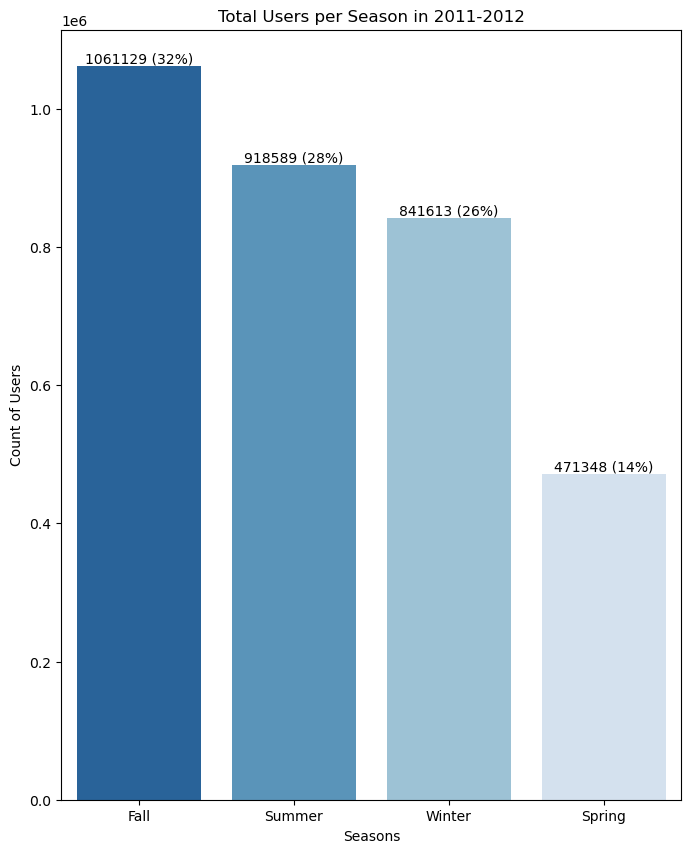

In [140]:
plt.figure(figsize=(8,10))
ax = sns.barplot(
    x = 'season',
    y = 'cnt',
    data = b.sort_values(by = 'cnt', ascending= False),
    palette = 'Blues_r'
)
plt.xlabel('Seasons')
plt.ylabel('Count of Users')
plt.title('Total Users per Season in 2011-2012')
abs_values = b['cnt']
rel_values = b['percentage']
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels = lbls)
plt.show()

Majority of the users are active during Fall season, 32% of total users during 2011-2012. Users are the least active during Spring season, only 14% of users during 2011-2012 uses bikeshare.

As the majority of users favor Fall season, there are potential bussiness benefit can be obtained during Fall season by running promotions or offers. Summer and Winter can also be utilized as 28% and 26% of users are active during respective seasons. 

# Conclusion

1. Amount of users did grow during 2011 to 2012, with average of 177.99% per quarter for registered users and 162.10% for casual users.
2. Adverse weather do affect the users amount, with the potential of 14.5% for registered user and 9.66% for casual user, with the total of 13.58% of users.
3. The favorite season of majority users is Fall season as 32% of the users active during Fall.